In [8]:
#import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import io
import pandas as pd
from datetime import datetime,timedelta

In [9]:
# loading the wiki.mat file from drive to process it
data = io.loadmat("data/wiki_crop/wiki.mat")

# loading the imdb.mat file from drive to process it, we take some female images from imdb as wiki do not have equal amount of male and female images 
data1 = io.loadmat("data/imdb_crop/imdb.mat")

In [10]:
print("wiki ",data.keys())
print("imdb ",data1.keys())

wiki  dict_keys(['__header__', '__version__', '__globals__', 'wiki'])
imdb  dict_keys(['__header__', '__version__', '__globals__', 'imdb'])


In [11]:
# since we need only the wiki data from the dictionary
wiki = data['wiki']
print(wiki)

print("\n")

# since we need only the wiki data from the dictionary
imdb = data1['imdb']
print(imdb)

[[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
        array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
        array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
        array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
        array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
        array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
      dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
        array(['Dettmar Cramer'], dtype='<U14'),
        array(['Marc Okrand'], dtype='<U11'), ...,
        array(['Michael Wiesinger'], dtype='<U17'),
        array(['Johann Grugger'], dtype='<U14'),
        array(['Greta Van Susteren'], dtype='<U18')]], dtype=object), array([[array([[111.29109473, 111.29109473, 252.66993082, 252.66993082]]),


In [12]:
#It can be observed that all the elements are stored in arrays, we separate them by storing each type of data with its respective name

# dob represents date of birth
dob = wiki[0][0][0][0]
dob1 = imdb[0][0][0][0]

#this represent the year when the photo was taken
photo_taken = wiki[0][0][1][0]
photo_taken1 = imdb[0][0][1][0]

#full_path has the path of each image
full_path = wiki[0][0][2][0]
full_path1 = imdb[0][0][2][0]

#gender variable represents the gender type of each photo, 0 for female and 1 for male, NaN if unknown
gender = wiki[0][0][3][0]
gender1 = imdb[0][0][3][0]
 
#we do not need face locations since the images are already cropped images 

# face score 1 represents if any face is present in the image or not, if no face is present in the image then value will be "-inf"
face_score1 = wiki[0][0][6][0]
face_score1_1 = imdb[0][0][6][0]

# face score 2 represents if any image has multiple faces or not, if value is nan then there are no multiple faces, score represents multiple faces are in the image  
face_score2 = wiki[0][0][7][0]
face_score2_1 = imdb[0][0][7][0]

In [13]:
print(dob)
print(full_path)

[723671 703186 711677 ... 720620 723893 713846]
[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31')
 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31')
 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29') ...
 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30')
 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30')
 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]


In [14]:
dob = np.array(dob,dtype=np.int64)
dob1 = np.array(dob1,dtype=np.int64)

dob_year = []
dob_year1 = []

#converting each serial number to year format by using datetime library, we need only year from dob to get the age by subtracting it from photo taken year 
for serial in dob:
  year = int(datetime.fromordinal(int(serial)).strftime("%Y"))
  dob_year.append(year)
    
for serial in dob1:
  year = int(datetime.fromordinal(int(serial)).strftime("%Y"))
  dob_year1.append(year)

In [15]:
print("Year of birth",dob_year[0]) # lets see the date of birth of first image
print("Year photo taken",photo_taken[0]) #lets see the the year when the photo is taken

Year of birth 1982
Year photo taken 2009


In [16]:
print("Year of birth",dob_year1[0]) # lets see the date of birth of first image
print("Year photo taken",photo_taken1[0]) #lets see the the year when the photo is taken

Year of birth 1900
Year photo taken 1968


In [17]:
# since we can observe that image paths are further stored in array format, the following is done
img_path = []
img_path1 = []

for path in full_path:
  img_path.append(path[0])

for path in full_path1:
  img_path1.append(path[0])

In [18]:
#img_path

In [19]:
dob = np.array(dob_year)
dob1 = np.array(dob_year1)

In [20]:
# stacking up all the data we need in our project 
final_wiki = np.vstack((dob,photo_taken,gender, img_path, face_score1, face_score2)).T

final_imdb = np.vstack((dob1,photo_taken1,gender1, img_path1, face_score1_1, face_score2_1)).T

In [21]:
# converting the stacked array to dataframe
data = pd.DataFrame(final_wiki)

data1 = pd.DataFrame(final_imdb)

In [22]:
#assigning the column names
cols = ["dob","photo_taken",'gender', 'img_path', 'face_score1', 'face_score2']
data.columns = cols
data1.columns = cols

In [23]:
# choosing data where the face score1 is not equal to "inf" and with face_score2 value "nan"
data = data[data['face_score1'] != '-inf']
data1 = data1[data1['face_score1'] != '-inf']

data = data[data['face_score2'] == 'nan']
data1 = data1[data1['face_score2'] == 'nan']

# removing data where gender value is "nan"
data = data[data['gender'] != 'nan']
data1 = data1[data1['gender'] != 'nan']

#Converting dob and photo taken columns to numeric so that we can calculate age
data[["dob", "photo_taken","gender"]] = data[["dob", "photo_taken","gender"]].apply(pd.to_numeric)
data1[["dob", "photo_taken","gender"]] = data1[["dob", "photo_taken","gender"]].apply(pd.to_numeric)

In [24]:
# we just need the age, so that we can drop off dob and photo taken years

data["age"] = data["photo_taken"] - data["dob"]

data1["age"] = data1["photo_taken"] - data1["dob"]

In [25]:
data.head()

,dob,photo_taken,gender,img_path,face_score1,face_score2,age
0,1982,2009,1.0,17/10000217_1981-05-05_2009.jpg,4.3009623883308095,nan,27
2,1949,2008,1.0,12/100012_1948-07-03_2008.jpg,4.329328832406529,nan,59
4,1972,2012,0.0,16/10002116_1971-05-31_2012.jpg,3.408442415222501,nan,40
5,1961,2012,0.0,02/10002702_1960-11-09_2012.jpg,4.748056377951486,nan,51
6,1938,1971,1.0,41/10003541_1937-09-27_1971.jpg,4.1848283121533445,nan,33


In [26]:
data1.head()

,dob,photo_taken,gender,img_path,face_score1,face_score2,age
3,1900,1968,1.0,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.872117169344902,nan,68
4,1900,1968,1.0,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.1587657871914132,nan,68
6,1925,2004,0.0,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,3.4791889134154426,nan,79
7,1925,2004,0.0,02/nm0000002_rm1363385088_1924-9-16_2004.jpg,3.87017062712482,nan,79
12,1925,1974,0.0,02/nm0000002_rm221957120_1924-9-16_1974.jpg,4.0964305784174595,nan,49


In [27]:
# now the face score 1 and 2 are not required we can just drop them
data = data.drop(["dob","photo_taken","face_score1", 'face_score2'], axis=1)

data1 = data1.drop(["dob","photo_taken","face_score1", 'face_score2'], axis=1)

<AxesSubplot:xlabel='gender', ylabel='count'>

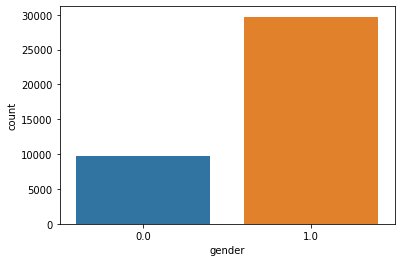

In [28]:
# A count plot displaying the number of male and female image we have
sns.countplot(data["gender"]) #It can be observed that there is unequal distribution of data, so I will drop some male images and add female to make sure the total count is nearly 40,000 in total

<AxesSubplot:xlabel='gender', ylabel='count'>

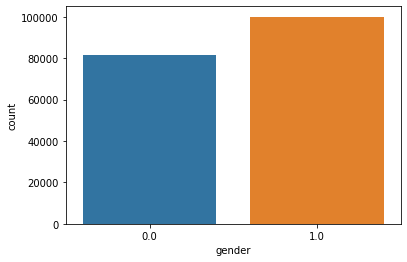

In [29]:
sns.countplot(data1["gender"])

<AxesSubplot:xlabel='age', ylabel='count'>

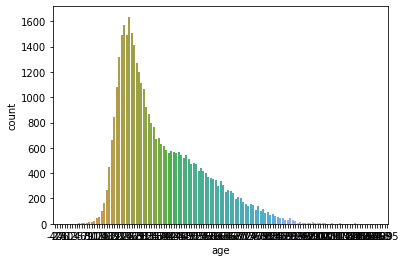

In [30]:
# A count plot that displays the total number of same age group people
sns.countplot(data["age"])

<AxesSubplot:xlabel='age', ylabel='count'>

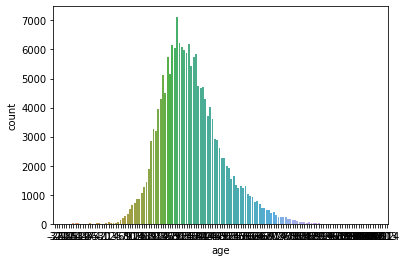

In [31]:
# A count plot that displays the total number of same age group people
sns.countplot(data1["age"])

**The imdb data do not have much images for low and high age groups, and in wiki data the female images are quite low compared to male, So let's add some female images from imdb to wiki data**

In [32]:
# dropping a set of male images
data = data.drop(data[data["gender"]==1].sample(n=10000,random_state = 42).index)
len(data)

29455

In [33]:
# adding female images from imdb data to wiki data
temp_df = data1[data1["gender"] == 0].sample(n=10000,random_state = 42)
temp_df.head()

,gender,img_path,age
285971,0.0,05/nm2439805_rm3206721792_1977-11-2_2009.jpg,31
370393,0.0,68/nm2362068_rm2370358016_1986-12-30_2012.jpg,25
191648,0.0,72/nm0305272_rm3695872512_1979-8-10_2009.jpg,29
297441,0.0,54/nm0932454_rm2672331264_1988-8-16_2009.jpg,20
363828,0.0,70/nm0261170_rm4153904896_1973-4-11_2010.jpg,36


In [41]:
data["img_path"] = data["img_path"].apply(lambda x: x.replace(x,"wiki_crop/" + x)) #adding the wiki folder name to image path

temp_df["img_path"] = temp_df["img_path"].apply(lambda x: x.replace(x,"imdb_crop/" + x)) # adding the imdb folder name to image path

In [43]:
temp_df.head()

,gender,img_path,age
285971,0.0,imdb_crop/05/nm2439805_rm3206721792_1977-11-2_...,31
370393,0.0,imdb_crop/68/nm2362068_rm2370358016_1986-12-30...,25
191648,0.0,imdb_crop/72/nm0305272_rm3695872512_1979-8-10_...,29
297441,0.0,imdb_crop/54/nm0932454_rm2672331264_1988-8-16_...,20
363828,0.0,imdb_crop/70/nm0261170_rm4153904896_1973-4-11_...,36


In [44]:
# finally appending all the data as
dataset = data.append(temp_df,ignore_index=True)

In [45]:
len(dataset)

39455

<AxesSubplot:xlabel='gender', ylabel='count'>

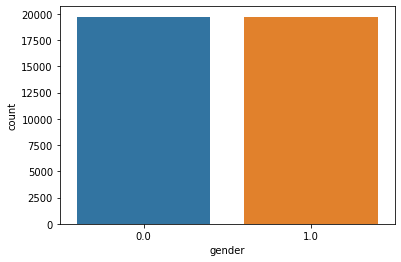

In [46]:
# plotting the data
sns.countplot(dataset["gender"])

<AxesSubplot:xlabel='age', ylabel='count'>

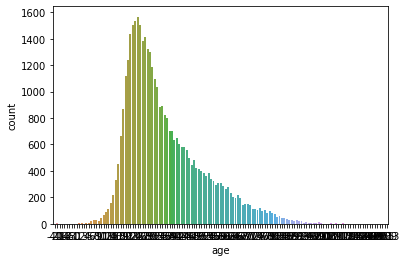

In [47]:
sns.countplot(dataset["age"])

In [48]:
# save this file so that, this can be used for building the model 
dataset.to_csv('data/dataset.csv',index=False)